## IMPORTING LIBARIRES:

In [1]:
import pandas as pd
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation,Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
! pip install seaborn
import seaborn as sns
import cv2


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


## DATA LOADING:

In [2]:
data_dir=r"DATASET\train"
cancer=[]
for file in os.listdir(data_dir):
    cancer+=[file]
print(cancer)
print(len(cancer))

['NORMAL', 'PNEUMONIA']
2


## PREPROCESSING:

In [3]:
img_height,img_width=224,224
batch_size=20

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = train_datagen.flow_from_directory(data_dir,target_size=(img_height,img_width),batch_size=batch_size,class_mode='categorical',subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,target_size=(img_height,img_width),batch_size=batch_size,class_mode='categorical',subset='validation')

Found 2221 images belonging to 2 classes.
Found 555 images belonging to 2 classes.


## APPLYING MOBILENET ALGORITHM:

In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(img_height,img_width, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(2, activation="softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 96)       

In [7]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist=model.fit_generator(train_generator,epochs=10,validation_data=test_generator,verbose=1)

C:\Users\0618\AppData\Local\Temp\ipykernel_5220\1616187481.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_generator,epochs=10,validation_data=test_generator,verbose=1)


Epoch 1/10


112/112 [==============================] - 84s 732ms/step - loss: 0.3733 - accuracy: 0.8703 - val_loss: 0.5700 - val_accuracy: 0.8342
Epoch 2/10
112/112 [==============================] - 71s 631ms/step - loss: 0.1654 - accuracy: 0.9446 - val_loss: 0.3012 - val_accuracy: 0.8901
Epoch 3/10
112/112 [==============================] - 78s 691ms/step - loss: 0.1103 - accuracy: 0.9694 - val_loss: 0.3941 - val_accuracy: 0.8793
Epoch 4/10
112/112 [==============================] - 79s 706ms/step - loss: 0.0590 - accuracy: 0.9811 - val_loss: 0.3371 - val_accuracy: 0.9027
Epoch 5/10
112/112 [==============================] - 72s 642ms/step - loss: 0.0353 - accuracy: 0.9896 - val_loss: 0.2529 - val_accuracy: 0.9279
Epoch 6/10
112/112 [==============================] - 70s 627ms/step - loss: 0.0260 - accuracy: 0.9932 - val_loss: 0.4196 - val_accuracy: 0.9135
Epoch 7/10
112/112 [==============================] - 72s 640ms/step - loss: 0.0478 - accuracy: 0.9851 - val_loss: 0.2434 - val_

## GRAPH:

TypeError: _process_plot_var_args.__call__() got multiple values for argument 'axes'

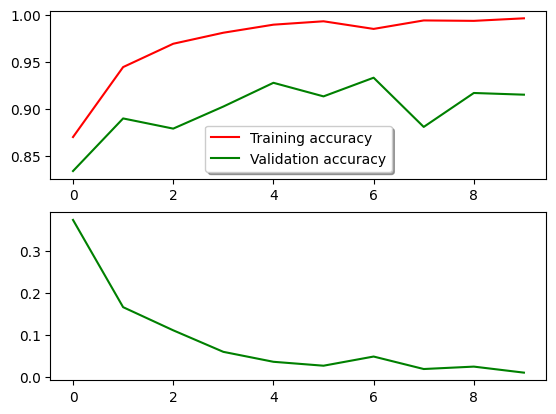

In [8]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='r', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='g',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='g', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)